✅ Step 1: Import Required Libraries
python
Copy code


In [1]:
import requests
import pandas as pd
import time
from textblob import TextBlob
import matplotlib.pyplot as plt


✅ Step 2: Define Popular Steam Games with App IDs
python
Copy code


In [9]:
games = {
    "Counter-Strike 2": "730",
    "Dota 2": "570",
    "PUBG: Battlegrounds": "578080",
    "Apex Legends": "1172470",
    "GTA V": "271590",
    "The Witcher 3": "292030",
    "Cyberpunk 2077": "1091500",
    "Rust": "252490",
    "Elden Ring": "1245620",
    "ARK: Survival Evolved": "346110",
    "Left 4 Dead 2": "550",
    "Team Fortress 2": "440",
    "DayZ": "221100",
    "Stardew Valley": "413150",
    "Among Us": "945360",
    "Red Dead Redemption 2": "1174180",
    "Terraria": "105600",
    "PAYDAY 2": "218620",
    "Don't Starve Together": "322330",
    "Rainbow Six Siege": "359550",
    "No Man's Sky": "275850",
    "Hogwarts Legacy": "990080",
    "Lethal Company": "1966720",
    "Palworld": "1623730",
    "Baldur's Gate 3": "1086940",
    "Hades": "1145360",
    "Sea of Thieves": "1172620",
    "Phasmophobia": "739630",
    "The Forest": "242760",
    "Project Zomboid": "108600"
}


✅ Step 3: Function to Fetch All Reviews (Paginated)

In [10]:
def fetch_all_reviews(app_id, game_name, max_reviews=1000):
    reviews = []
    cursor = '*'
    count = 0

    while count < max_reviews:
        url = f"https://store.steampowered.com/appreviews/{app_id}?json=1&num_per_page=100&cursor={cursor}&filter=recent&language=english"
        response = requests.get(url)
        if response.status_code != 200:
            print(f"[ERROR] Status code {response.status_code} for {game_name}")
            break

        data = response.json()
        new_reviews = data.get("reviews", [])
        if not new_reviews:
            break

        for r in new_reviews:
            if r["review"].strip():
                reviews.append({
                    "game": game_name,
                    "review": r["review"],
                    "voted_up": r["voted_up"],
                    "timestamp": pd.to_datetime(r["timestamp_created"], unit='s'),
                    "platform": "Steam"
                })

        cursor = data.get("cursor", "")
        count += len(new_reviews)
        time.sleep(0.5)  # Avoid rate-limiting

    return reviews


✅ Step 4: Collect Reviews for All Games

In [11]:
all_reviews = []

for game, app_id in games.items():
    print(f"[INFO] Scraping reviews for {game}")
    game_reviews = fetch_all_reviews(app_id, game, max_reviews=1000)
    all_reviews.extend(game_reviews)

print(f"[INFO] Total reviews collected: {len(all_reviews)}")


[INFO] Scraping reviews for Counter-Strike 2
[INFO] Scraping reviews for Dota 2
[INFO] Scraping reviews for PUBG: Battlegrounds
[INFO] Scraping reviews for Apex Legends
[INFO] Scraping reviews for GTA V
[INFO] Scraping reviews for The Witcher 3
[INFO] Scraping reviews for Cyberpunk 2077
[INFO] Scraping reviews for Rust
[INFO] Scraping reviews for Elden Ring
[INFO] Scraping reviews for ARK: Survival Evolved
[INFO] Scraping reviews for Left 4 Dead 2
[INFO] Scraping reviews for Team Fortress 2
[INFO] Scraping reviews for DayZ
[INFO] Scraping reviews for Stardew Valley
[INFO] Scraping reviews for Among Us
[INFO] Scraping reviews for Red Dead Redemption 2
[INFO] Scraping reviews for Terraria
[INFO] Scraping reviews for PAYDAY 2
[INFO] Scraping reviews for Don't Starve Together
[INFO] Scraping reviews for Rainbow Six Siege
[INFO] Scraping reviews for No Man's Sky
[INFO] Scraping reviews for Hogwarts Legacy
[INFO] Scraping reviews for Lethal Company
[INFO] Scraping reviews for Palworld
[INFO]

✅ Step 5: Create DataFrame and Clean Review Data

In [12]:
steam_df = pd.DataFrame(all_reviews)
steam_df.dropna(subset=["review"], inplace=True)
steam_df = steam_df[steam_df["review"].str.strip().astype(bool)]
steam_df.reset_index(drop=True, inplace=True)
steam_df.head()


,game,review,voted_up,timestamp,platform
0,Counter-Strike 2,"Let's be honest, who hasn't heard of CS2? You ...",True,2025-07-05 16:37:53,Steam
1,Counter-Strike 2,Before I played:\n＼＼ ＿\n ＼( ͡° ͜ʖ ͡°)\n <...,True,2025-07-05 16:36:48,Steam
2,Counter-Strike 2,i love cs,True,2025-07-05 16:36:36,Steam
3,Counter-Strike 2,good game,True,2025-07-05 16:35:38,Steam
4,Counter-Strike 2,i like,True,2025-07-05 16:33:07,Steam


✅ Step 6: Perform Sentiment Analysis with TextBlob

In [13]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return "positive"
    elif polarity < -0.1:
        return "negative"
    else:
        return "neutral"

steam_df["sentiment"] = steam_df["review"].apply(get_sentiment)
steam_df.head()


,game,review,voted_up,timestamp,platform,sentiment
0,Counter-Strike 2,"Let's be honest, who hasn't heard of CS2? You ...",True,2025-07-05 16:37:53,Steam,positive
1,Counter-Strike 2,Before I played:\n＼＼ ＿\n ＼( ͡° ͜ʖ ͡°)\n <...,True,2025-07-05 16:36:48,Steam,neutral
2,Counter-Strike 2,i love cs,True,2025-07-05 16:36:36,Steam,positive
3,Counter-Strike 2,good game,True,2025-07-05 16:35:38,Steam,positive
4,Counter-Strike 2,i like,True,2025-07-05 16:33:07,Steam,neutral


✅ Step 7: Visualize Sentiment Distribution

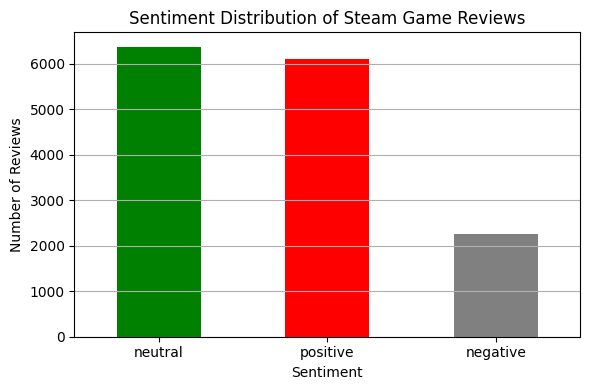

In [14]:
sentiment_counts = steam_df["sentiment"].value_counts()
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution of Steam Game Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


✅ Step 8: Save Reviews to CSV

In [15]:
steam_df.to_csv("steam_game_reviews.csv", index=False)
print("[INFO] Reviews saved to 'steam_game_reviews.csv'")


[INFO] Reviews saved to 'steam_game_reviews.csv'


Preprocessing

✅ Step 1: Preprocess Data Using NLP
We'll cover:

Lowercasing

Removing punctuation and special characters

Tokenization

Stopword removal

Stemming (or Lemmatization)

🧼 Step 1: Clean and Tokenize Without nltk

In [23]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from nltk.stem import PorterStemmer

# Load your data
df = pd.read_csv("steam_game_reviews.csv")

# Optional: Keep only 'positive' and 'negative'
df = df[df['sentiment'].isin(['positive', 'negative'])].copy()
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Basic tokenizer using regex and stemming
stemmer = PorterStemmer()

def clean_text(text):
    # Lowercase, remove non-letters
    text = re.sub(r"[^a-zA-Z\s]", "", str(text).lower())
    tokens = text.split()
    # Apply stemming
    stemmed = [stemmer.stem(word) for word in tokens if len(word) > 2]
    return " ".join(stemmed)

# Apply to all reviews
df["cleaned_review"] = df["review"].apply(clean_text)
df[["review", "cleaned_review"]].head()


,review,cleaned_review
0,"Let's be honest, who hasn't heard of CS2? You ...",let honest who hasnt heard you buy prime get y...
2,i love cs,love
3,good game,good game
6,Fun,fun
11,"Fix this game now. Bullets that don't go, terr...",fix thi game now bullet that dont terribl opti...


✅ Step 2: Train Naive Bayes Sentiment Classifier

In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df["cleaned_review"], df["label"], test_size=0.2, random_state=42
)

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Naive Bayes classifier
model_nb = MultinomialNB()
model_nb.fit(X_train_tfidf, y_train)

# Evaluation
y_pred = model_nb.predict(X_test_tfidf)
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))


              precision    recall  f1-score   support

    Negative       0.96      0.35      0.51       442
    Positive       0.81      1.00      0.89      1229

    accuracy                           0.82      1671
   macro avg       0.89      0.67      0.70      1671
weighted avg       0.85      0.82      0.79      1671



✅ Step 3: Train an LSTM Sentiment Classifier
We'll follow this workflow:

Tokenize text into sequences

Pad sequences to the same length

Build LSTM model using Keras

Train and evaluate the model

📦 Step 3.1: Install and Import Required Libraries

In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report


🧪 Step 3.2: Tokenization and Padding

In [26]:
# Prepare data
texts = df["cleaned_review"].astype(str).tolist()
labels = df["label"].tolist()

# Tokenize the text
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences
padded = pad_sequences(sequences, maxlen=200, padding='post', truncating='post')

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)


🧠 Step 3.3: Define and Train LSTM Model

In [27]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=200),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
import numpy as np

y_train = np.array(y_train)
y_test = np.array(y_test)


In [30]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=64,
    verbose=1
)


Epoch 1/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 17s 125ms/step - accuracy: 0.7119 - loss: 0.6120 - val_accuracy: 0.7355 - val_loss: 0.5785
Epoch 2/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - accuracy: 0.7198 - loss: 0.5982 - val_accuracy: 0.7355 - val_loss: 0.5801
Epoch 3/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 112ms/step - accuracy: 0.7240 - loss: 0.5929 - val_accuracy: 0.7355 - val_loss: 0.5848
Epoch 4/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 22s 130ms/step - accuracy: 0.7388 - loss: 0.5756 - val_accuracy: 0.7355 - val_loss: 0.5799
Epoch 5/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 19s 118ms/step - accuracy: 0.7323 - loss: 0.5851 - val_accuracy: 0.7355 - val_loss: 0.5779


🧾 Step 3.4: Evaluate the Model

In [31]:
# Predict on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))


53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       442
    Positive       0.74      1.00      0.85      1229

    accuracy                           0.74      1671
   macro avg       0.37      0.50      0.42      1671
weighted avg       0.54      0.74      0.62      1671



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Step 4: Plot Training Accuracy and Loss
This step uses the history object returned by .fit() to plot:

Training vs. validation accuracy

Training vs. validation loss

📊 Plot Accuracy and Loss Curves

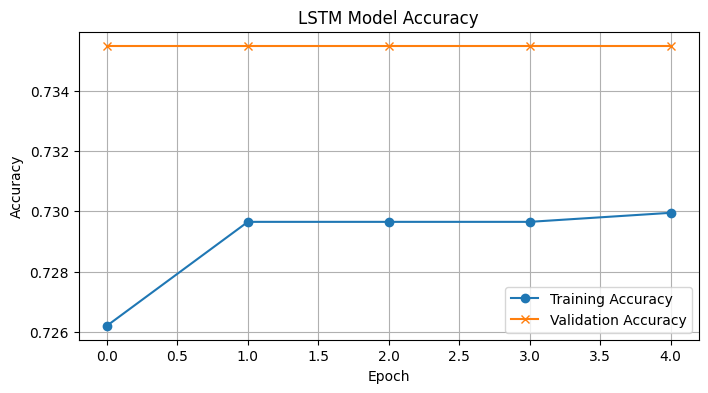

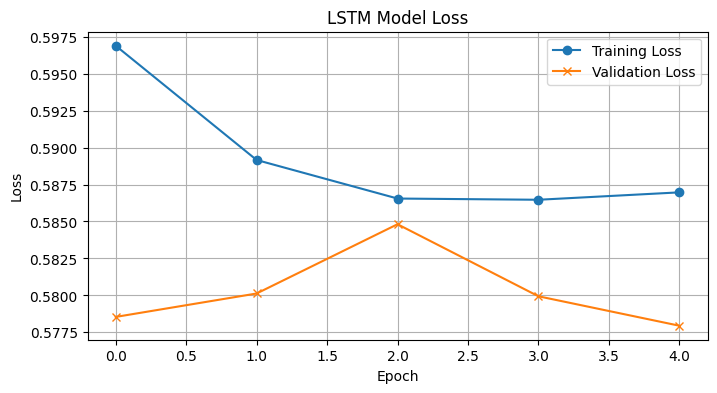

In [32]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Plot
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


✅ Step 5: Compare Naive Bayes vs. LSTM Model
We'll show:

Accuracy

Precision

Recall

F1-score

For both models in a simple bar chart comparison.

📋 Step 5.1: Extract Metrics from Both Models
Assuming you've already run:

y_pred_nb from Naive Bayes

y_pred_lstm from LSTM

Let’s calculate the scores:

In [34]:
# Re-run if needed: Naive Bayes predictions
y_pred_nb = model_nb.predict(X_test_tfidf)

# Re-run: LSTM predictions
y_pred_prob_lstm = model.predict(X_test)
y_pred_lstm = (y_pred_prob_lstm > 0.5).astype(int).flatten()


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Metrics for Naive Bayes
acc_nb = accuracy_score(y_test, y_pred_nb)
prec_nb = precision_score(y_test, y_pred_nb)
rec_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

# Metrics for LSTM
acc_lstm = accuracy_score(y_test, y_pred_lstm)
prec_lstm = precision_score(y_test, y_pred_lstm)
rec_lstm = recall_score(y_test, y_pred_lstm)
f1_lstm = f1_score(y_test, y_pred_lstm)


📊 Step 5.2: Bar Chart Comparison

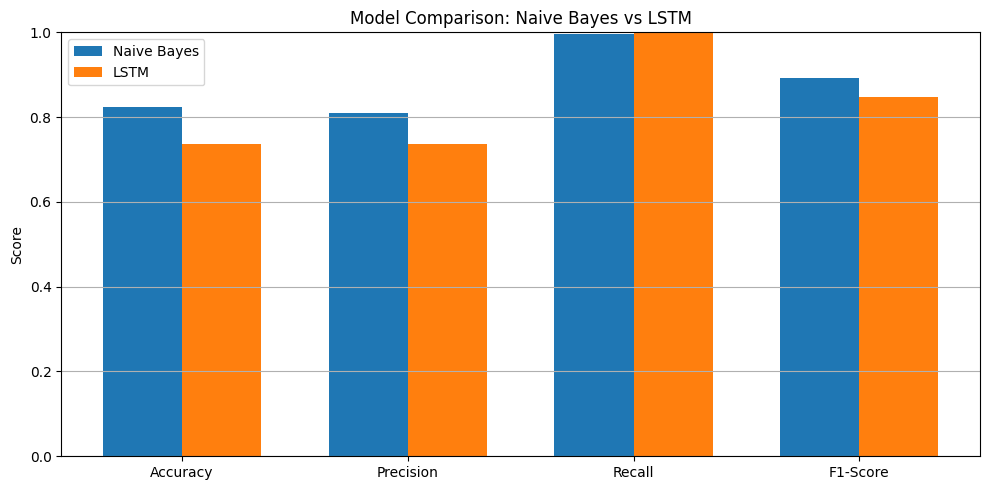

In [36]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
nb_scores = [acc_nb, prec_nb, rec_nb, f1_nb]
lstm_scores = [acc_lstm, prec_lstm, rec_lstm, f1_lstm]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10,5))
plt.bar(x - width/2, nb_scores, width, label='Naive Bayes')
plt.bar(x + width/2, lstm_scores, width, label='LSTM')
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Model Comparison: Naive Bayes vs LSTM")
plt.ylim(0, 1.0)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()
